In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json  
import cv2
import numpy as np


In [36]:
def show_img(data, path, landmark_points):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    # target_landmark = landmark_points.index
    # # print(landmark_points.index)
    # # print(data)
    # for idx in range(0,len(data.columns),2):
    #     radius = 2
    #     print(data.columns[idx])
    #     if data.columns[idx] in ['13-0x']:
    #         x = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx]]
    #         y = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx+1]]
    #         if data.columns[idx] == 'frame':
    #             continue
    #         cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    #     # if data.columns[idx][:-1] in target_landmark:
    #     #     # print(x,y)
    #     #     cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius*2, color=(255,255,0), thickness=-1, lineType=cv2.LINE_AA)
    #     # else:
    # for point_pair in landmark_points:
    #     x1 = data.loc[int(float(path.split('/')[4][:-4]))][point_pair[0]+'x']
    #     y1 = data.loc[int(float(path.split('/')[4][:-4]))][point_pair[0]+'y']
    #     x2 = data.loc[int(float(path.split('/')[4][:-4]))][point_pair[1]+'x']
    #     y2 = data.loc[int(float(path.split('/')[4][:-4]))][point_pair[1]+'y']
    #     cv2.line(drawing_image, (int(x1), int(y1)), (int(x2), int(y2)), (255,255,0), radius)
    # # img_show(drawing_image)
    # left = data.loc[int(float(path.split('/')[4][:-4]))]['left']
    # top = data.loc[int(float(path.split('/')[4][:-4]))]['top']
    # right = data.loc[int(float(path.split('/')[4][:-4]))]['right']
    # bottom = data.loc[int(float(path.split('/')[4][:-4]))]['bottom']
    # plt.subplots(figsize=(10,10))
    # # cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [52]:
def show_flow(emo, order):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(len(emotion[emo]), 1, figsize = (20,20))
    for idx in range(len(emotion[emo])):
        target_list = [i[0].replace('-',' - ') + " -> " + i[1].replace('-', ' - ') for i in emotion[emo][idx]['landmark_pair']]
        temp_plot = sns.lineplot(data = df[target_list], markers=False, dashes=False, ax=ax[idx])        
        ax[idx].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[emo][idx]['name'], fontsize=30)
    plt.show()

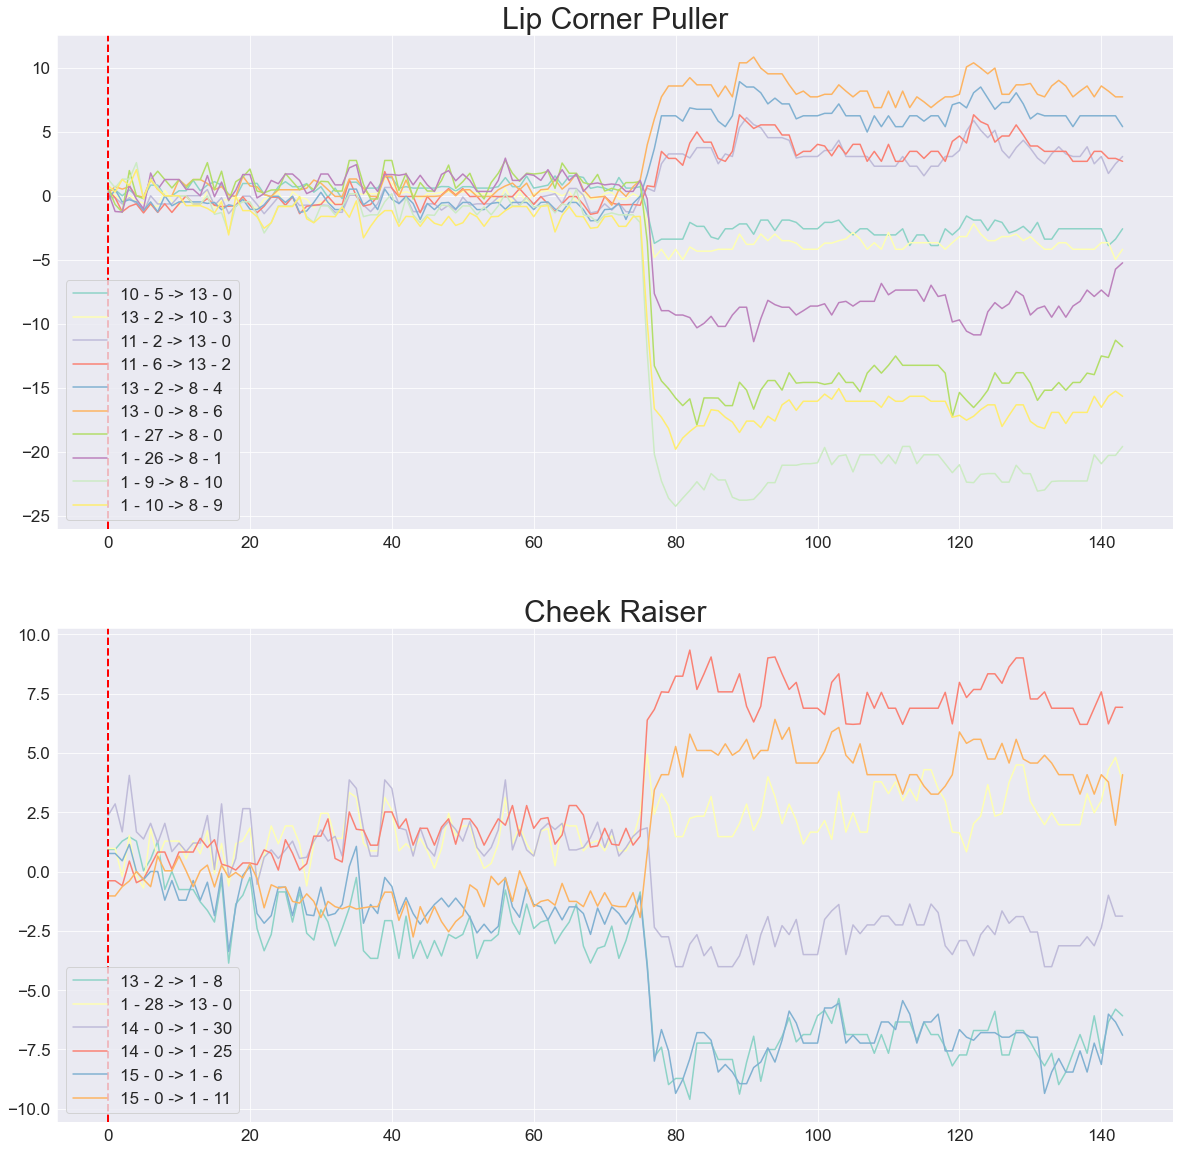

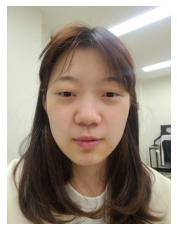

In [58]:
face = '곽웃기'
emo = 'Happy'
image_order = 0
df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
with open('../data/image_analysis/emotion_rule.json', 'r') as f:
    emotion = json.load(f)
show_flow(emo, image_order)
show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', diff_list)